# 二值图像轮廓提取算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def tobinary(gray,thresh):
    dst = np.zeros_like(gray)
    idx = (gray >= thresh)
    dst[idx] = 255
    return dst

def contour_extraction(src):
    rows,cols = src.shape
    dst = np.zeros_like(src)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            p1 = src[i,j]
            p2 = src[i - 1,j]
            p3 = src[i + 1,j]
            p4 = src[i - 1,j - 1]
            p5 = src[i - 1,j + 1]
            p6 = src[i,j - 1]
            p7 = src[i,j + 1]
            p8 = src[i + 1,j - 1]
            p9 = src[i + 1,j + 1]
            
            if p1 == 0 and p2 == 0 and p3 == 0 \
                and p4 == 0 and p5 == 0 and p6 == 0 \
                and p7 == 0 and p8 == 0 and p9 == 0:
                
                dst[i,j] = 255
    return dst
            

In [5]:
gray = rgb2gray(src)
binary = tobinary(gray,160)
dst = contour_extraction(binary)

Text(0.5,1,'Contour')

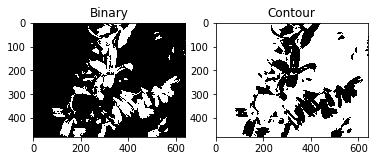

In [10]:
plt.subplot(121)
plt.imshow(binary,'gray')
plt.title('Binary')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Contour')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45040351